In [1]:
import sys
import numpy as np
from pathlib import Path

current_dir = Path().resolve()
python_files_dir = current_dir.parent / "Python_Files"
if str(python_files_dir) not in sys.path:
    sys.path.append(str(python_files_dir))

from config import CFG
from helpers import load_selected_data, merge_transaction_data,check_missing_and_infinite, plot_distribution, analyze_numeric_column_over_time, drop_negative_values

## Read Data

- Instead of hardcoding file paths or reading CSVs directly in multiple cells, I used a config file (CFG) and a data loading function (load_selected_data) to keep things clean, modular, and reusable.

In [2]:
data = load_selected_data(CFG, ['df_transaction', 'df_test','df_shop_list', 'df_item_list','df_category_list'])
df_transaction = data['df_transaction']
df_test = data['df_test']
df_shop_list = data['df_shop_list']
df_item_list = data['df_item_list']
df_category_list = data['df_category_list']

## Merging Data

In [3]:
df_test

,shop,item
0,101,100031
1,101,100486
2,101,100787
3,101,100794
4,101,100968
...,...,...
31526,158,122087
31527,158,122088
31528,158,122091
31529,158,122100


In [3]:
df_merged = merge_transaction_data(
    df_transaction,
    df_item_list,
    df_category_list,
    df_shop_list
)

df_merged

,date,shop,item,price,amount,item_name,item_id,item_category_id,item_category_name,shop_name,shop_id
0,02.01.2013,158,122154,3244.0,1.0,PHENOMENON 2012 (BD),122154,1037,Кино - Blu-Ray,"Yaroslavl, TC ""Altair""",158
1,03.01.2013,124,102552,2920.0,1.0,DEEP PURPLE The House Of Blue Light LP,102552,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124
2,05.01.2013,124,102552,2920.0,-1.0,DEEP PURPLE The House Of Blue Light LP,102552,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124
3,06.01.2013,124,102554,5550.0,1.0,DEEP PURPLE Who Do You Think We Are LP,102554,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124
4,15.01.2013,124,102555,3569.0,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),102555,1056,Music - CD Branded Production,"Moscow, Atrium shopping mall",124
...,...,...,...,...,...,...,...,...,...,...,...
2882330,27.09.2015,124,121022,5842.0,1.0,Футболка Batman Arkham Knight Half Batman Half...,121022,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882331,19.09.2015,124,121105,5842.0,1.0,Футболка Fallout Laser Gun XL,121105,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882332,30.09.2015,124,121088,4219.0,1.0,Diablo III Special Edition T-Shirt Black S,121088,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882333,08.09.2015,124,120990,4219.0,1.0,Футболка Assassin's Creed IV Black Flag Animus...,120990,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124


## Analysing Missing/Nan Values

In [5]:
summary_df = check_missing_and_infinite(df_merged)
print(summary_df[summary_df["missing"] > 0])       
print(summary_df[summary_df["infinite"] > 0])

Empty DataFrame
Columns: [missing, infinite]
Index: []
Empty DataFrame
Columns: [missing, infinite]
Index: []


## Data Distribution

- Before applying any machine learning models or statistical methods, I first explored the distribution of the data. This helps me understand:

    - Whether the data is normally distributed or skewed

    - If there are outliers or anomalies

    - Whether scaling or transformation is needed (e.g., log, min-max, etc.)

    - How balanced or imbalanced the dataset is, especially for target variables in classification or anomaly detection problems

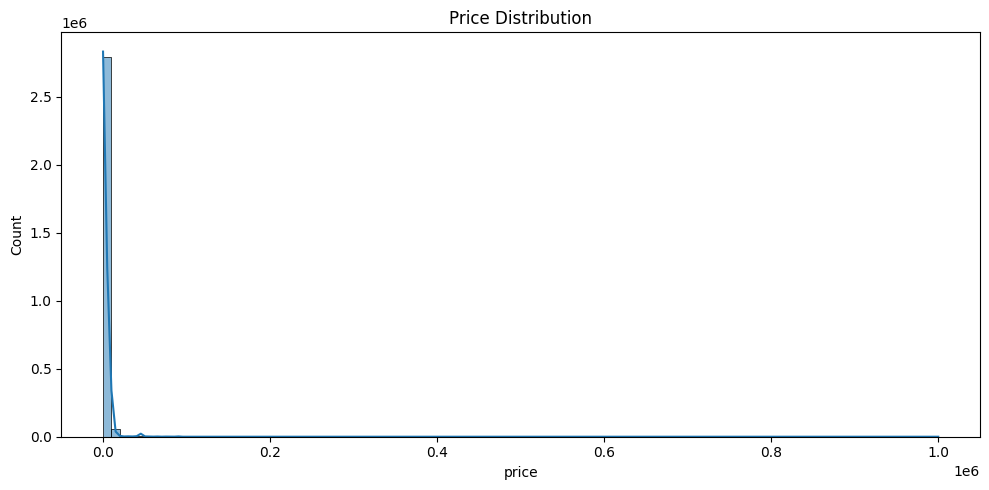

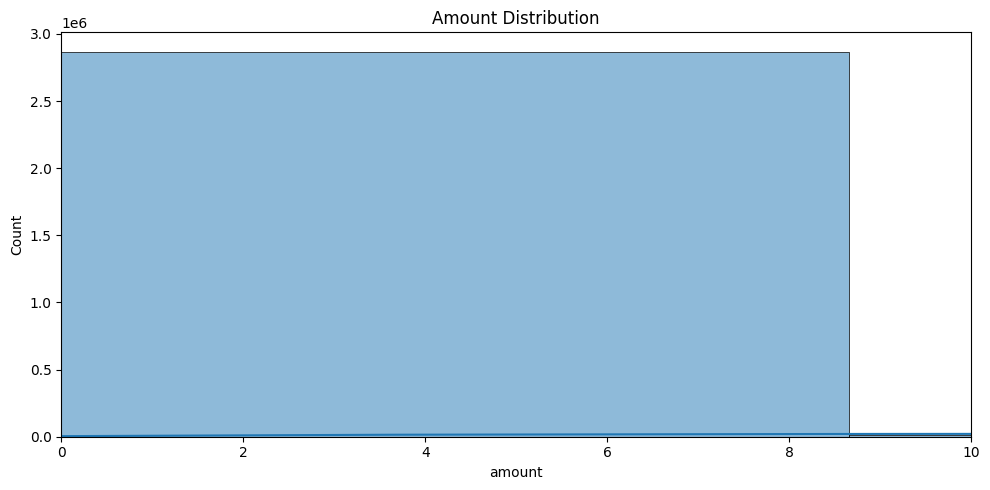

In [5]:
plot_distribution(df_merged, column='price', title='Price Distribution')
plot_distribution(df_merged, column='amount', title='Amount Distribution', xlim=(0, 10))

- The price variable exhibits highly right-skewed distribution
- And for amount variable we can say that the histogram suggests a high frequency of repeated values

## Detecting/Analysing Outliers

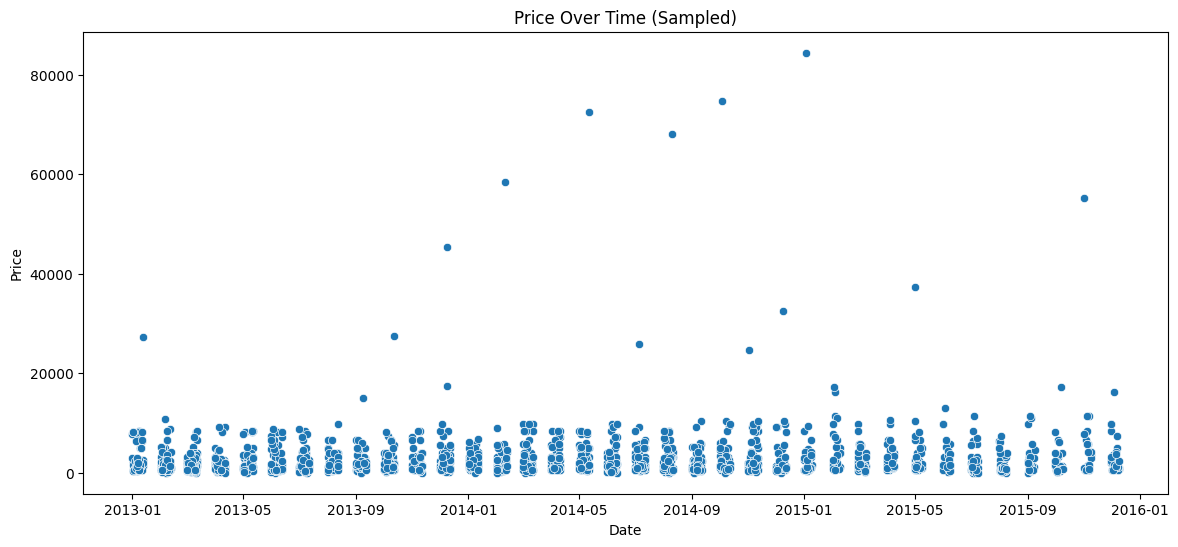

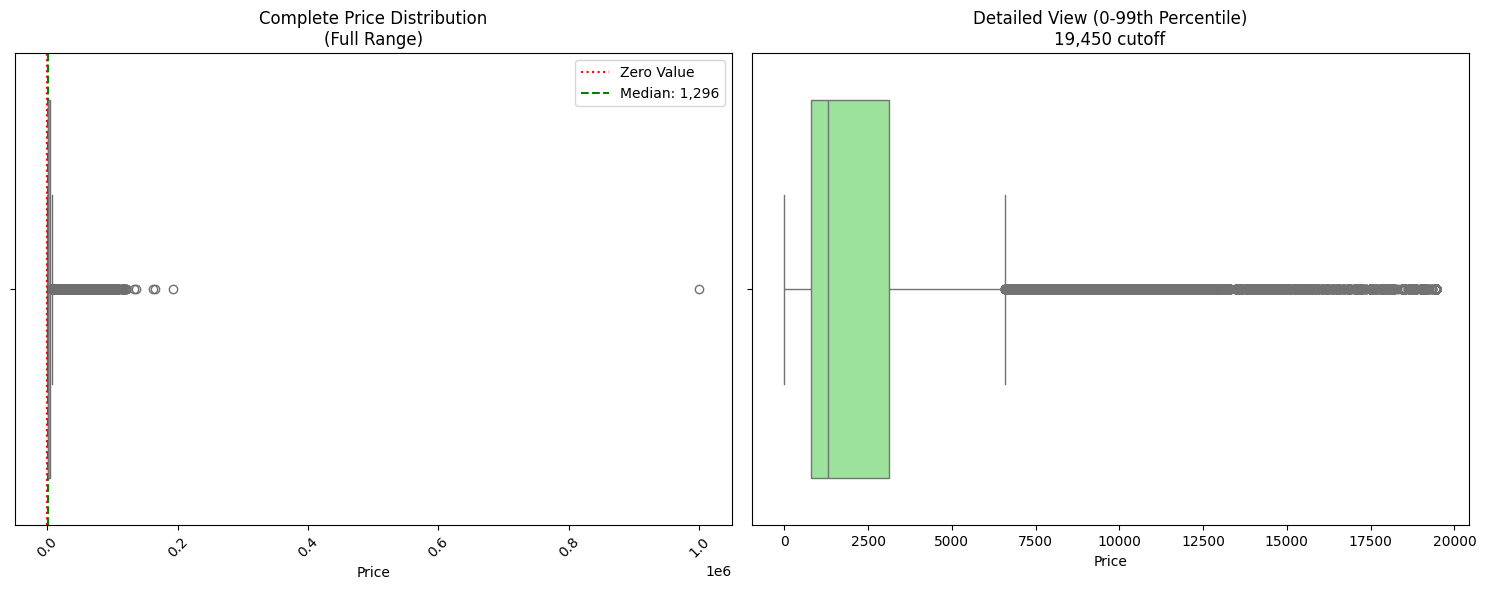


Price Statistics:
Min: -1
Max: 1,000,000
Median: 1,296
Mean: 2,873
IQR: 809 to 3,244



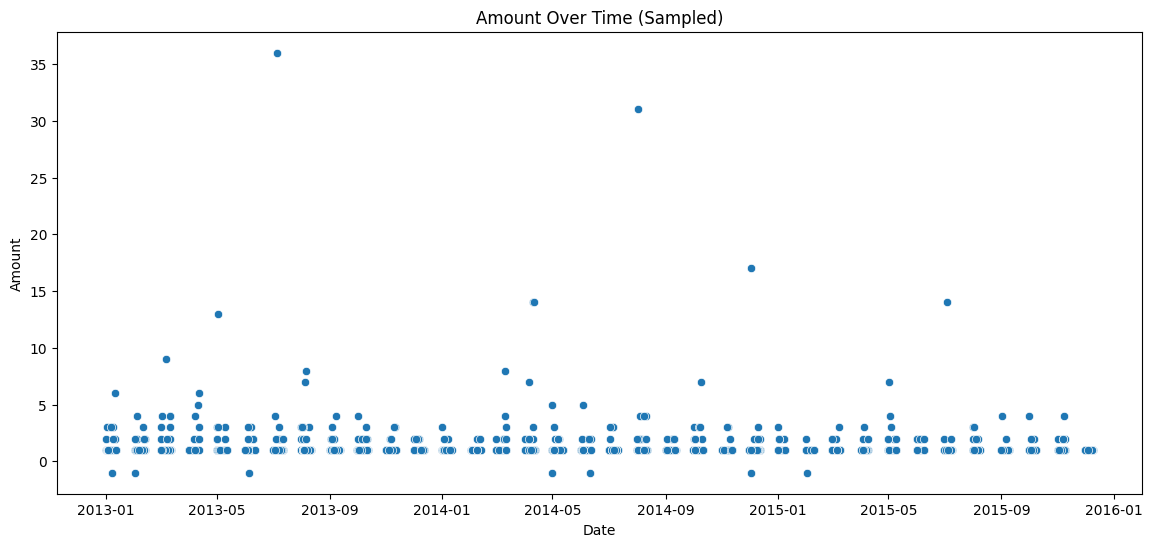

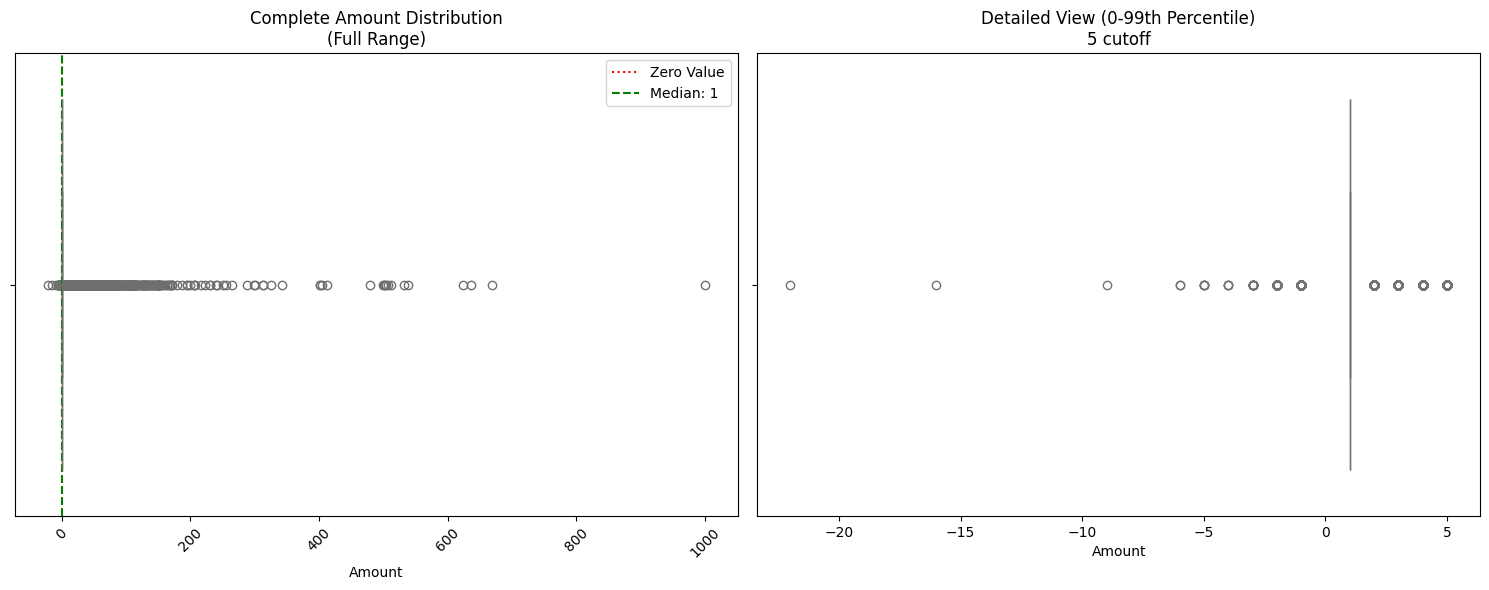


Amount Statistics:
Min: -22
Max: 1,000
Median: 1
Mean: 1
IQR: 1 to 1



In [9]:
analyze_numeric_column_over_time(df_merged, column="price")
analyze_numeric_column_over_time(df_merged, column="amount")


## Dropping Negative Values

- Since price and amount values cant be negative

In [6]:
df_clean = drop_negative_values(df_merged, ['price', 'amount'])
df_clean

,date,shop,item,price,amount,item_name,item_id,item_category_id,item_category_name,shop_name,shop_id
0,02.01.2013,158,122154,3244.0,1.0,PHENOMENON 2012 (BD),122154,1037,Кино - Blu-Ray,"Yaroslavl, TC ""Altair""",158
1,03.01.2013,124,102552,2920.0,1.0,DEEP PURPLE The House Of Blue Light LP,102552,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124
3,06.01.2013,124,102554,5550.0,1.0,DEEP PURPLE Who Do You Think We Are LP,102554,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124
4,15.01.2013,124,102555,3569.0,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),102555,1056,Music - CD Branded Production,"Moscow, Atrium shopping mall",124
5,10.01.2013,124,102564,1134.0,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,102564,1059,Music - Music Video,"Moscow, Atrium shopping mall",124
...,...,...,...,...,...,...,...,...,...,...,...
2882330,27.09.2015,124,121022,5842.0,1.0,Футболка Batman Arkham Knight Half Batman Half...,121022,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882331,19.09.2015,124,121105,5842.0,1.0,Футболка Fallout Laser Gun XL,121105,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882332,30.09.2015,124,121088,4219.0,1.0,Diablo III Special Edition T-Shirt Black S,121088,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882333,08.09.2015,124,120990,4219.0,1.0,Футболка Assassin's Creed IV Black Flag Animus...,120990,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124


In [26]:
df_clean.isna().sum()  # Check for missing values after dropping negatives

date                  0
shop                  0
item                  0
price                 0
amount                0
item_name             0
item_id               0
item_category_id      0
item_category_name    0
shop_name             0
shop_id               0
dtype: int64

In [27]:
df_clean

,date,shop,item,price,amount,item_name,item_id,item_category_id,item_category_name,shop_name,shop_id
0,02.01.2013,158,122154,3244.0,1.0,PHENOMENON 2012 (BD),122154,1037,Кино - Blu-Ray,"Yaroslavl, TC ""Altair""",158
1,03.01.2013,124,102552,2920.0,1.0,DEEP PURPLE The House Of Blue Light LP,102552,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124
3,06.01.2013,124,102554,5550.0,1.0,DEEP PURPLE Who Do You Think We Are LP,102554,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124
4,15.01.2013,124,102555,3569.0,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),102555,1056,Music - CD Branded Production,"Moscow, Atrium shopping mall",124
5,10.01.2013,124,102564,1134.0,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,102564,1059,Music - Music Video,"Moscow, Atrium shopping mall",124
...,...,...,...,...,...,...,...,...,...,...,...
2882330,27.09.2015,124,121022,5842.0,1.0,Футболка Batman Arkham Knight Half Batman Half...,121022,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882331,19.09.2015,124,121105,5842.0,1.0,Футболка Fallout Laser Gun XL,121105,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882332,30.09.2015,124,121088,4219.0,1.0,Diablo III Special Edition T-Shirt Black S,121088,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882333,08.09.2015,124,120990,4219.0,1.0,Футболка Assassin's Creed IV Black Flag Animus...,120990,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124


## Pattern Analysis

In [30]:
df_merged['revenue'] = df_merged['price'] * df_merged['amount']
top_items_amount = (
    df_merged.groupby(['item', 'item_name'])['amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


top_items_revenue = (
    df_merged.groupby(['item', 'item_name'])['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print("Top 10 Items by Amount Sold:")
print(top_items_amount)

print("\nTop 10 Items by Revenue:")
print(top_items_revenue)

Top 10 Items by Amount Sold:
     item                                          item_name    amount
0  120949  Branded T-shirt package 1C Interest white (34*...  183564.0
1  102808                             Diablo III [PC, Jewel]   17205.0
2  103732        Grand Theft Auto V [PS3, Russian subtitles]   16596.0
3  117717                  Acceptance of funds for 1C-Online   15309.0
4  105822  Playstation Store wallet top-up: Payment card ...   14256.0
5  103734   Grand Theft Auto V [Xbox 360, Russian subtitles]   11630.0
6  106675  Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...   10287.0
7  101855                                 Battlefield 4 [PC]   10027.0
8  103731         Grand Theft Auto V [PC, Russian subtitles]    9865.0
9  116787                               The Last of Us [PS3]    9208.0

Top 10 Items by Revenue:
     item                                          item_name      revenue
0  106675  Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...  712202572.0
1  103732       

C:\Users\seyda.aybar\AppData\Local\Temp\ipykernel_27768\1678350425.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


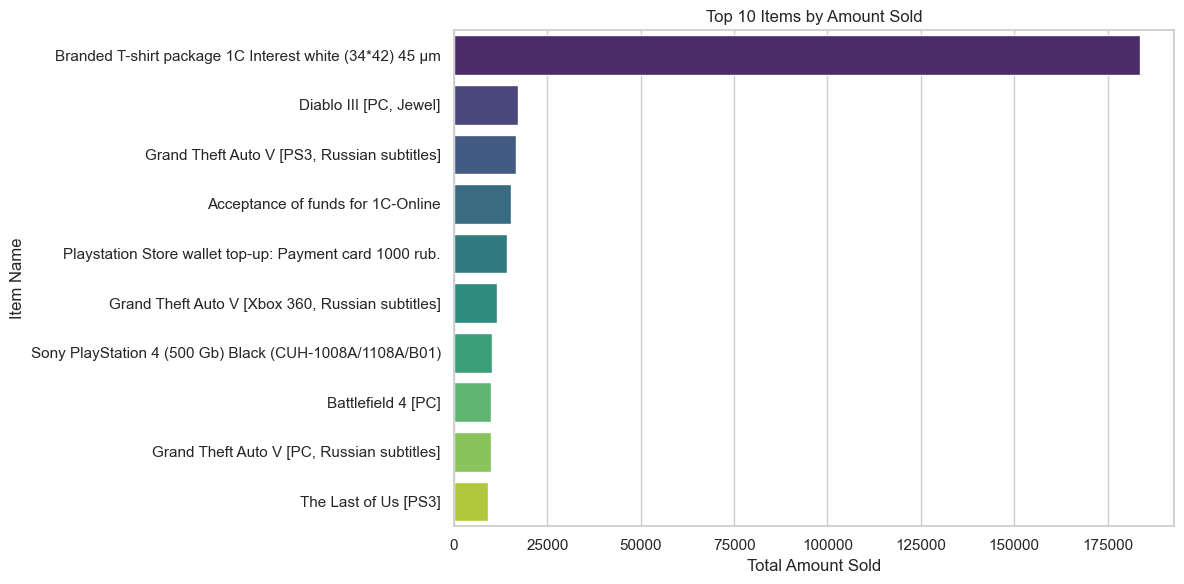

C:\Users\seyda.aybar\AppData\Local\Temp\ipykernel_27768\1678350425.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


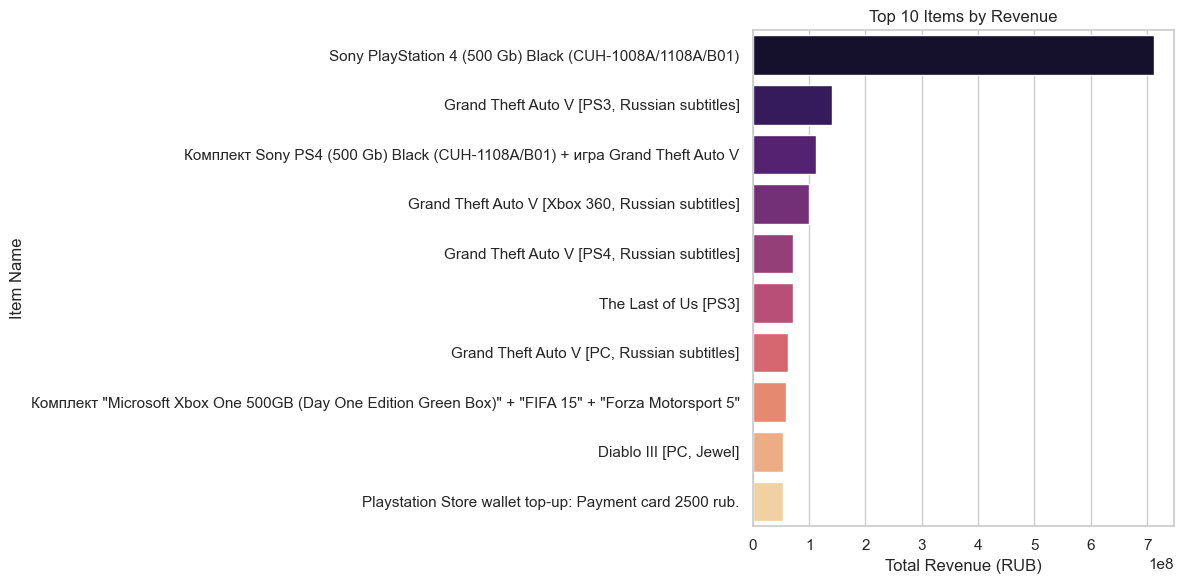

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_items_amount,
    y='item_name',
    x='amount',
    palette='viridis'
)
plt.title('Top 10 Items by Amount Sold')
plt.xlabel('Total Amount Sold')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_items_revenue,
    y='item_name',
    x='revenue',
    palette='magma'
)
plt.title('Top 10 Items by Revenue')
plt.xlabel('Total Revenue (RUB)')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

### Long Tail Analysis - Understand How Revenue is distributed across items
- It shows pareto princible
    - 80% of the outcomes come from 20% of the causes

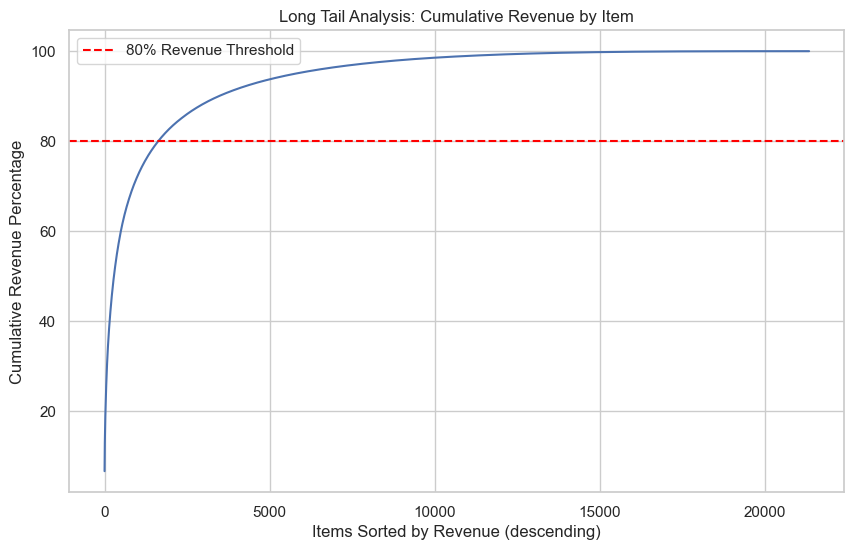

Number of items generating 80% of revenue: 1627
Number of items in the long tail: 19705
Revenue contributed by long tail items: 2,153,301,785 RUB


In [33]:
item_sales = (
    df_merged.groupby(['item', 'item_name'])
    .agg({'amount': 'sum', 'revenue': 'sum'})
    .reset_index()
)


item_sales = item_sales.sort_values('revenue', ascending=False).reset_index(drop=True)


item_sales['cum_revenue'] = item_sales['revenue'].cumsum()
total_revenue = item_sales['revenue'].sum()
item_sales['cum_revenue_pct'] = item_sales['cum_revenue'] / total_revenue * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=item_sales, x=item_sales.index + 1, y='cum_revenue_pct')
plt.xlabel('Items Sorted by Revenue (descending)')
plt.ylabel('Cumulative Revenue Percentage')
plt.title('Long Tail Analysis: Cumulative Revenue by Item')
plt.axhline(80, color='red', linestyle='--', label='80% Revenue Threshold')
plt.legend()
plt.show()


top_contributors = item_sales[item_sales['cum_revenue_pct'] <= 80]
long_tail_items = item_sales[item_sales['cum_revenue_pct'] > 80]

print(f"Number of items generating 80% of revenue: {len(top_contributors)}")
print(f"Number of items in the long tail: {len(long_tail_items)}")
print(f"Revenue contributed by long tail items: {long_tail_items['revenue'].sum():,.0f} RUB")

In [34]:
shop_sales = df_merged.groupby('shop_name')['revenue'].sum().reset_index()

top_10_shops = shop_sales.sort_values('revenue', ascending=False).head(10)

top_items_per_shop = (
    df_merged[df_merged['shop_name'].isin(top_10_shops['shop_name'])]
    .groupby(['shop_name', 'item_name'])['revenue']
    .sum()
    .reset_index()
)

top_1_item_per_shop = (
    top_items_per_shop.sort_values(['shop_name', 'revenue'], ascending=[True, False])
    .groupby('shop_name')
    .head(1)
    .reset_index(drop=True)
)

result = top_10_shops.merge(top_1_item_per_shop, on='shop_name', suffixes=('_shop', '_item'))

print(result[['shop_name', 'revenue_shop', 'item_name', 'revenue_item']])

                              shop_name  revenue_shop  \
0    Moscow, Semenovsky Shopping Center   744419945.0   
1          Moscow, Atrium shopping mall   678302230.0   
2       Moscow, TC "MEGA Teply Stan" II   507761048.0   
3     St. Petersburg TC "Nevsky Center"   473249728.0   
4                      Khimki TC "Mega"   461018512.0   
5     Moscow, TC "MEGA Belaya Dacha II"   456733972.0   
6            Yakutsk, Ordzhonikidze, 56   359168850.0   
7  Online store of emergency situations   357858729.0   
8         Voronezh (Plekhanovskaya, 13)   310472226.0   
9                 Krasnoyarsk TC "June"   264880393.0   

                                           item_name  revenue_item  
0  Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...    36164970.0  
1  Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...    37316081.0  
2  Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...    24648857.0  
3  Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...    34888956.0  
4  Sony PlayStation 4 (500 

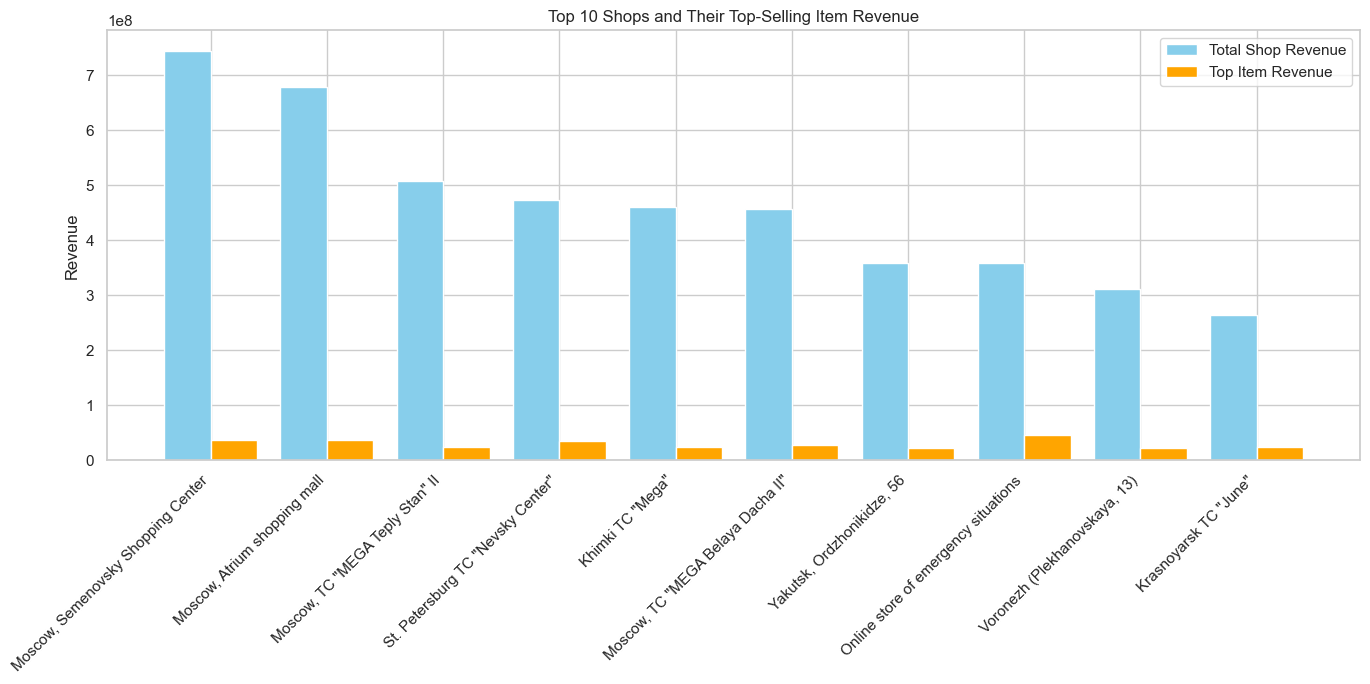

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

bar_width = 0.4

positions = range(len(result))

plt.bar(
    [p - bar_width/2 for p in positions], 
    result['revenue_shop'], 
    width=bar_width, 
    label='Total Shop Revenue', 
    color='skyblue'
)

plt.bar(
    [p + bar_width/2 for p in positions], 
    result['revenue_item'], 
    width=bar_width, 
    label='Top Item Revenue', 
    color='orange'
)

plt.xticks(positions, result['shop_name'], rotation=45, ha='right')

plt.ylabel('Revenue')
plt.title('Top 10 Shops and Their Top-Selling Item Revenue')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\seyda.aybar\AppData\Local\Temp\ipykernel_27768\1871061549.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['price'] * x['amount']).sum())
C:\Users\seyda.aybar\AppData\Local\Temp\ipykernel_27768\1871061549.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


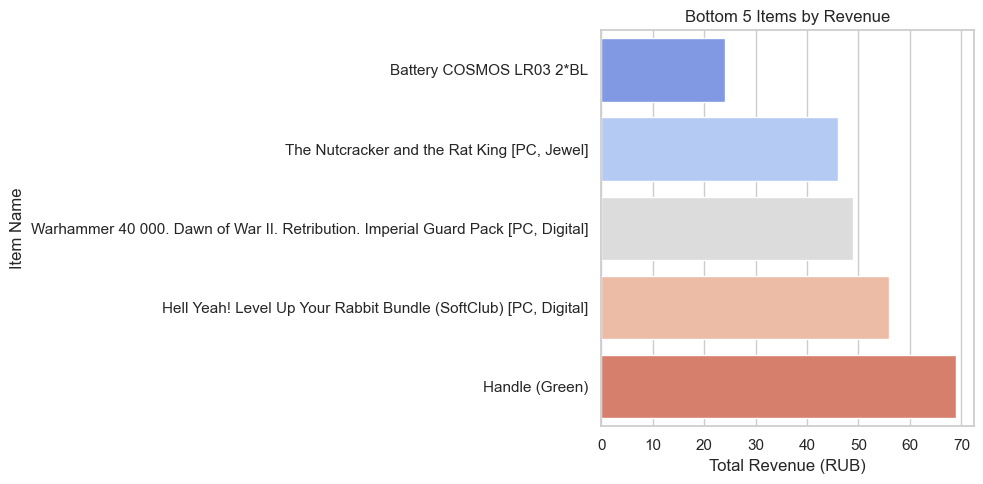

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

bottom_items_amount = df_clean.groupby('item_name')['amount'].sum().nsmallest(5).reset_index()

bottom_items_revenue = (df_clean.groupby('item_name')
                        .apply(lambda x: (x['price'] * x['amount']).sum())
                        .nsmallest(5)
                        .reset_index(name='revenue'))

plt.figure(figsize=(10, 5))
sns.barplot(
    data=bottom_items_revenue,
    y='item_name',
    x='revenue',
    palette='coolwarm'
)
plt.title('Bottom 5 Items by Revenue')
plt.xlabel('Total Revenue (RUB)')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()



- The plot shows how many items account for what percentage of total revenue.

- Usually, a small number of items generate most revenue (the “head”), and many items form the “long tail.”



## Seasonality

Since the problem asks for monthly predictions, first group our data by month per shop and item

In [40]:
import pandas as pd
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%d.%m.%Y')
df_clean['month'] = df_clean['date'].dt.to_period('M')

monthly_sales = (
    df_clean.groupby(['month', 'shop_id', 'item_id'])['amount']
    .sum()
    .reset_index()
)
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()


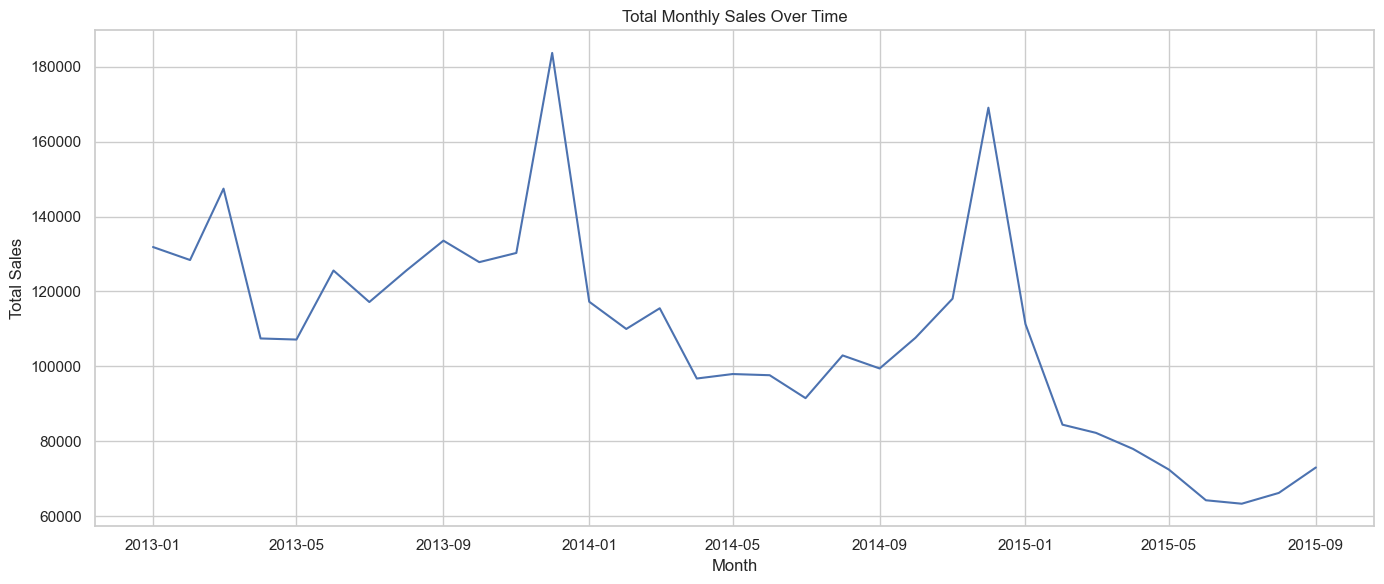

In [41]:
total_monthly = monthly_sales.groupby('month')['amount'].sum()

plt.figure(figsize=(14, 6))
sns.lineplot(x=total_monthly.index, y=total_monthly.values)
plt.title('Total Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


- The seasonal pattern is yearly, and the magnitude of seasonal peaks is large — meaning it dominates the signal.

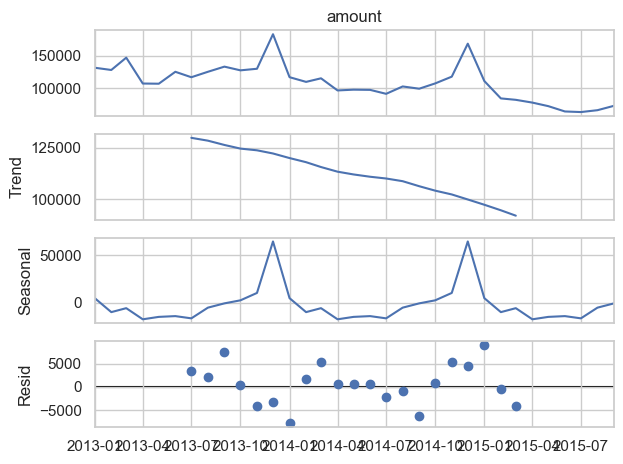

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(total_monthly, model='additive', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()


In [57]:
df_merged

,date,shop,item,price,amount,item_name,item_id,item_category_id,item_category_name,shop_name,shop_id,revenue,month
0,02.01.2013,158,122154,3244.0,1.0,PHENOMENON 2012 (BD),122154,1037,Кино - Blu-Ray,"Yaroslavl, TC ""Altair""",158,3244.0,2013-01
1,03.01.2013,124,102552,2920.0,1.0,DEEP PURPLE The House Of Blue Light LP,102552,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124,2920.0,2013-01
2,05.01.2013,124,102552,2920.0,-1.0,DEEP PURPLE The House Of Blue Light LP,102552,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124,-2920.0,2013-01
3,06.01.2013,124,102554,5550.0,1.0,DEEP PURPLE Who Do You Think We Are LP,102554,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124,5550.0,2013-01
4,15.01.2013,124,102555,3569.0,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),102555,1056,Music - CD Branded Production,"Moscow, Atrium shopping mall",124,3569.0,2013-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882330,27.09.2015,124,121022,5842.0,1.0,Футболка Batman Arkham Knight Half Batman Half...,121022,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124,5842.0,2015-09
2882331,19.09.2015,124,121105,5842.0,1.0,Футболка Fallout Laser Gun XL,121105,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124,5842.0,2015-09
2882332,30.09.2015,124,121088,4219.0,1.0,Diablo III Special Edition T-Shirt Black S,121088,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124,4219.0,2015-09
2882333,08.09.2015,124,120990,4219.0,1.0,Футболка Assassin's Creed IV Black Flag Animus...,120990,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124,4219.0,2015-09


In [69]:
df_clean.drop(columns=['month', 'revenue'], inplace=True)

In [70]:
df_clean

,date,shop,item,price,amount,item_name,item_id,item_category_id,item_category_name,shop_name,shop_id
0,02.01.2013,158,122154,3244.0,1.0,PHENOMENON 2012 (BD),122154,1037,Кино - Blu-Ray,"Yaroslavl, TC ""Altair""",158
1,03.01.2013,124,102552,2920.0,1.0,DEEP PURPLE The House Of Blue Light LP,102552,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124
3,06.01.2013,124,102554,5550.0,1.0,DEEP PURPLE Who Do You Think We Are LP,102554,1058,Music - Vinyl,"Moscow, Atrium shopping mall",124
4,15.01.2013,124,102555,3569.0,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),102555,1056,Music - CD Branded Production,"Moscow, Atrium shopping mall",124
5,10.01.2013,124,102564,1134.0,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,102564,1059,Music - Music Video,"Moscow, Atrium shopping mall",124
...,...,...,...,...,...,...,...,...,...,...,...
2882330,27.09.2015,124,121022,5842.0,1.0,Футболка Batman Arkham Knight Half Batman Half...,121022,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882331,19.09.2015,124,121105,5842.0,1.0,Футболка Fallout Laser Gun XL,121105,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882332,30.09.2015,124,121088,4219.0,1.0,Diablo III Special Edition T-Shirt Black S,121088,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124
2882333,08.09.2015,124,120990,4219.0,1.0,Футболка Assassin's Creed IV Black Flag Animus...,120990,1061,Gifts - Merchandise,"Moscow, Atrium shopping mall",124


In [7]:
df_clean.to_csv('/Users/seydaaybar/Desktop/ntt_data/data/df.csv', index=False)